In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster

file_path = r"D:\Download\Data Science\Clustering\Clustering\EastWestAirlines.xlsx"

desc = pd.read_excel(file_path, sheet_name="Description")
print("Description of dataset columns:")
print(desc.head())

Description of dataset columns:
  East-West Airlines is trying to learn more about its customers.  Key issues are their  \
0  flying patterns, earning and use of frequent f...                                      
1  card.  The task is to identify customer segmen...                                      
2                                                NaN                                      
3                                                NaN                                      
4  Source: Based upon real business data; company...                                      

  Unnamed: 1 Unnamed: 2 Unnamed: 3 Unnamed: 4  
0        NaN        NaN        NaN        NaN  
1        NaN        NaN        NaN        NaN  
2        NaN        NaN        NaN        NaN  
3        NaN        NaN        NaN        NaN  
4        NaN        NaN        NaN        NaN  


In [2]:
df = pd.read_excel(file_path, sheet_name="data")
print("Dataset shape:", df.shape)
df.head()

Dataset shape: (3999, 12)


,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


In [ ]:
sns.pairplot(df, palette='rainbow', hue = 'Bonus_miles')
plt.show()

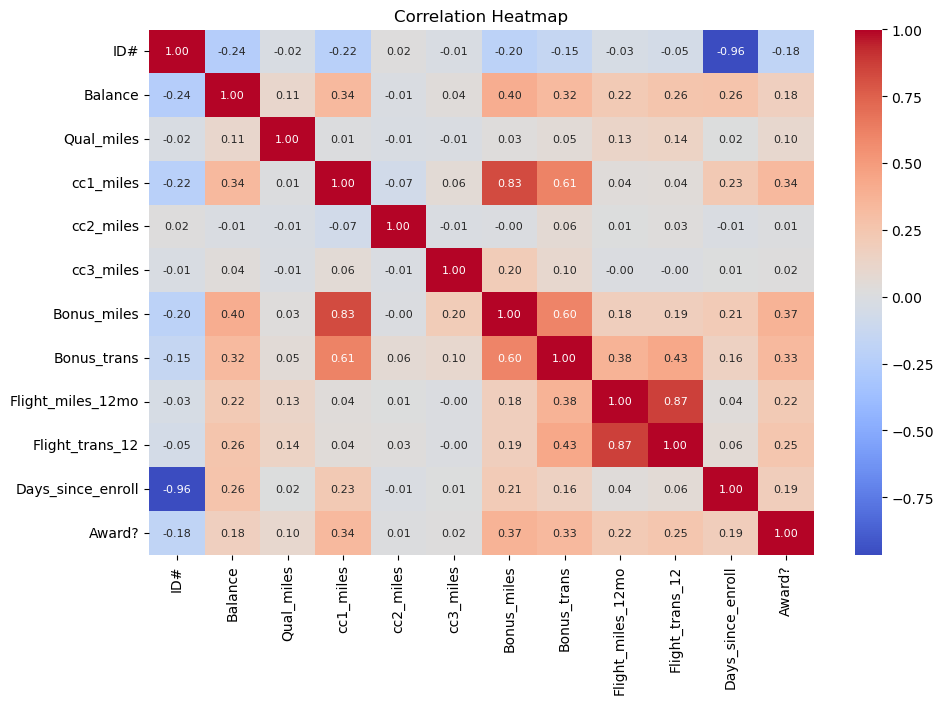

In [4]:
# 7) Correlation heatmap
plt.figure(figsize=(10,7))
sns.heatmap(df.corr(), cmap="coolwarm",fmt=".2f", annot=True, annot_kws={"size": 8})
plt.tight_layout()
plt.title("Correlation Heatmap")
plt.show()

In [5]:
# 3) Drop duplicates and handle missing values
df = df.drop_duplicates()
df = df.fillna(df.median(numeric_only=True))

# 4) Select numeric columns (exclude IDs if present)
num_cols = df.select_dtypes(include=[np.number]).columns.tolist()
X = df[num_cols]
print("Numeric columns:", num_cols)

# 5) Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

Numeric columns: ['ID#', 'Balance', 'Qual_miles', 'cc1_miles', 'cc2_miles', 'cc3_miles', 'Bonus_miles', 'Bonus_trans', 'Flight_miles_12mo', 'Flight_trans_12', 'Days_since_enroll', 'Award?']


In [6]:
# 6) Quick summary
X.describe()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
count,3999.000000,3.999000e+03,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.00000,3999.000000,3999.000000,3999.00000,3999.000000
mean,2014.819455,7.360133e+04,144.114529,2.059515,1.014504,1.012253,17144.846212,11.60190,460.055764,1.373593,4118.55939,0.370343
std,1160.764358,1.007757e+05,773.663804,1.376919,0.147650,0.195241,24150.967826,9.60381,1400.209171,3.793172,2065.13454,0.482957
min,1.000000,0.000000e+00,0.000000,1.000000,1.000000,1.000000,0.000000,0.00000,0.000000,0.000000,2.00000,0.000000
25%,1010.500000,1.852750e+04,0.000000,1.000000,1.000000,1.000000,1250.000000,3.00000,0.000000,0.000000,2330.00000,0.000000
50%,2016.000000,4.309700e+04,0.000000,1.000000,1.000000,1.000000,7171.000000,12.00000,0.000000,0.000000,4096.00000,0.000000
75%,3020.500000,9.240400e+04,0.000000,3.000000,1.000000,1.000000,23800.500000,17.00000,311.000000,1.000000,5790.50000,1.000000
max,4021.000000,1.704838e+06,11148.000000,5.000000,3.000000,5.000000,263685.000000,86.00000,30817.000000,53.000000,8296.00000,1.000000


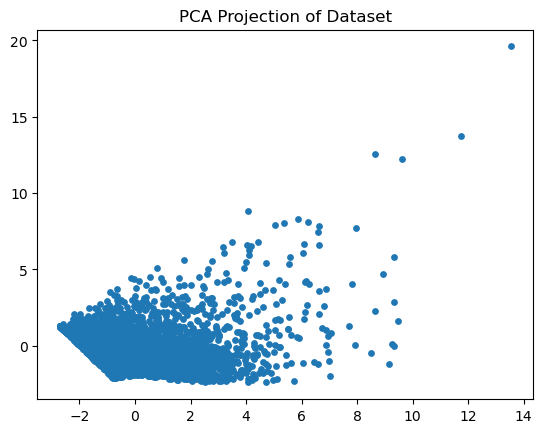

In [7]:
# 8) PCA for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
plt.scatter(X_pca[:,0], X_pca[:,1], s=15)
plt.title("PCA Projection of Dataset")
plt.show()

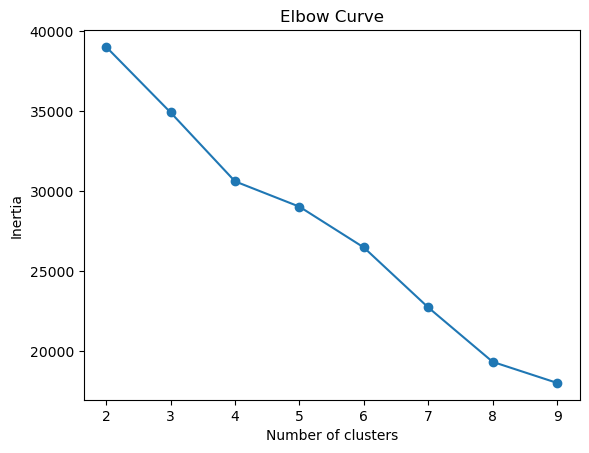

In [8]:
inertias = []
for k in range(2, 10):
    km = KMeans(n_clusters=k, random_state=42, n_init="auto")
    km.fit(X_scaled)
    inertias.append(km.inertia_)

plt.plot(range(2,10), inertias, marker="o")
plt.title("Elbow Curve")
plt.xlabel("Number of clusters")
plt.ylabel("Inertia")
plt.show()


KMeans silhouette: 0.201891717665419


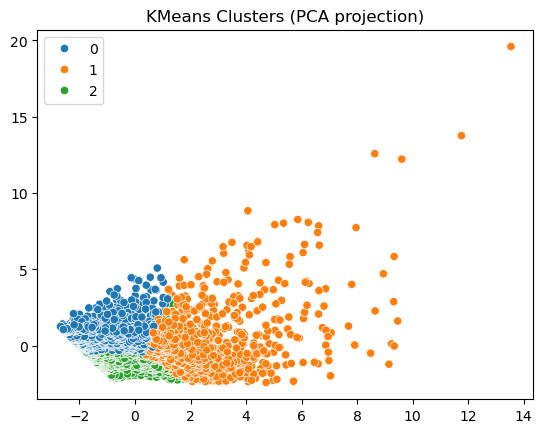

In [9]:
# 10) Fit KMeans with chosen K (say 3)
kmeans = KMeans(n_clusters=3, random_state=42, n_init="auto")
k_labels = kmeans.fit_predict(X_scaled)
print("KMeans silhouette:", silhouette_score(X_scaled, k_labels))

sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=k_labels, palette="tab10")
plt.title("KMeans Clusters (PCA projection)")
plt.show()


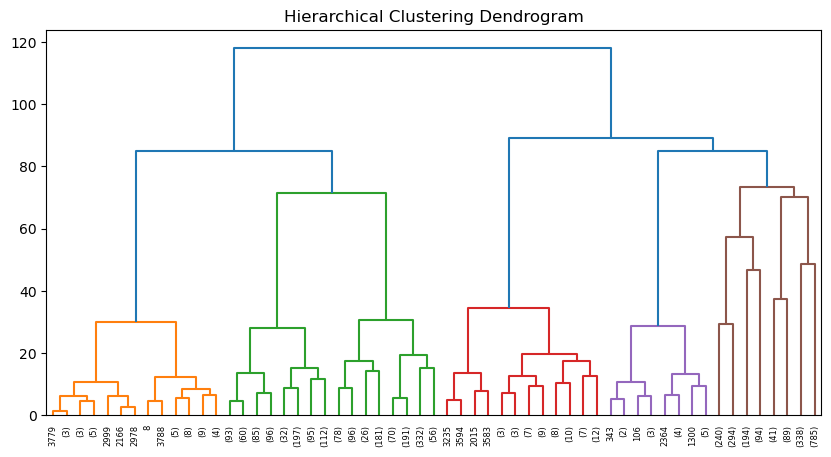

In [10]:
# 11) Dendrogram
Z = linkage(X_scaled, method="ward")
plt.figure(figsize=(10,5))
dendrogram(Z, truncate_mode="level", p=5)
plt.title("Hierarchical Clustering Dendrogram")
plt.show()


Hierarchical silhouette: 0.20526614352218822


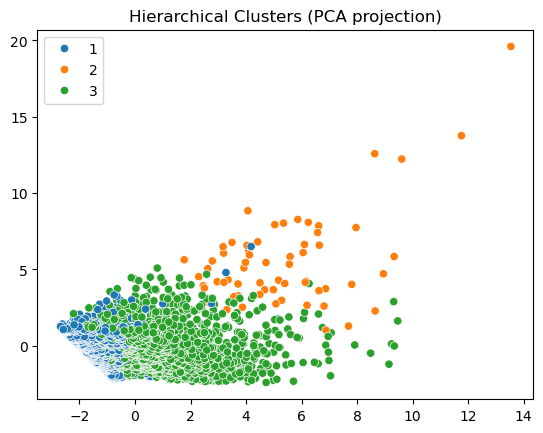

In [11]:
# 12) Cut into clusters
hier_labels = fcluster(Z, 3, criterion="maxclust")
print("Hierarchical silhouette:", silhouette_score(X_scaled, hier_labels))

sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=hier_labels, palette="tab10")
plt.title("Hierarchical Clusters (PCA projection)")
plt.show()


DBSCAN clusters: {np.int64(0), np.int64(1), np.int64(2), np.int64(3), np.int64(4), np.int64(5), np.int64(6), np.int64(-1)}
DBSCAN silhouette: 0.2443052365377352


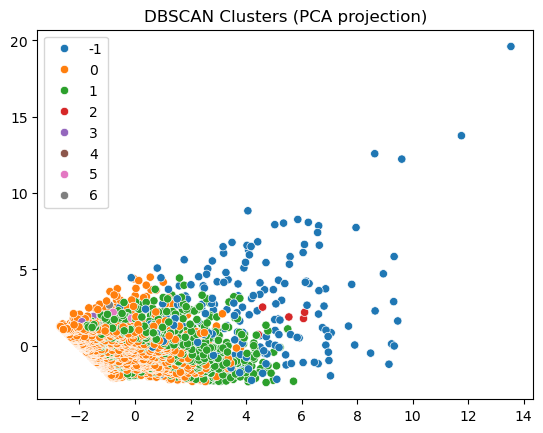

In [12]:
# 13) DBSCAN
dbscan = DBSCAN(eps=2, min_samples=5)  # tune eps based on k-distance plot
db_labels = dbscan.fit_predict(X_scaled)

unique_labels = set(db_labels)
print("DBSCAN clusters:", unique_labels)

if len(unique_labels - {-1}) > 1:
    sil_db = silhouette_score(X_scaled[db_labels != -1], db_labels[db_labels != -1])
    print("DBSCAN silhouette:", sil_db)

sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=db_labels, palette="tab10")
plt.title("DBSCAN Clusters (PCA projection)")
plt.show()

In [13]:
# 14) Add cluster labels back to dataset
df["kmeans_cluster"] = k_labels
df["hier_cluster"] = hier_labels
df["dbscan_cluster"] = db_labels

# 15) Profile clusters
print("KMeans cluster profiles:")
print(df.groupby("kmeans_cluster")[num_cols].mean().round(2))

print("Hierarchical cluster profiles:")
print(df.groupby("hier_cluster")[num_cols].mean().round(2))

print("DBSCAN cluster profiles (excluding noise):")
print(df[df["dbscan_cluster"]!=-1].groupby("dbscan_cluster")[num_cols].mean().round(2))

KMeans cluster profiles:
                    ID#    Balance  Qual_miles  cc1_miles  cc2_miles  \
kmeans_cluster                                                         
0               3111.39   40980.91      105.01       1.44       1.02   
1               1533.87  150218.95      297.37       3.83       1.01   
2               1078.57   58553.19       83.81       1.55       1.02   

                cc3_miles  Bonus_miles  Bonus_trans  Flight_miles_12mo  \
kmeans_cluster                                                           
0                    1.00      6917.62         8.14             237.18   
1                    1.05     48249.51        21.64            1197.57   
2                    1.00      7550.20         8.70             209.89   

                Flight_trans_12  Days_since_enroll  Award?  
kmeans_cluster                                              
0                          0.69            2196.56    0.23  
1                          3.59            4983.93    0.75  